In [1]:
import numpy as np
import itertools
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import netCDF4

In [2]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-1.0, vmax = 1.0)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [3]:
z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/2D_PCA_Latent_Space__31.npy")
#z_test_tsne = z_test_tsne[:int(912384/10),:]
Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_W_Test.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")
Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

In [4]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

# Deep Convection to Deep Convection Interpolation 

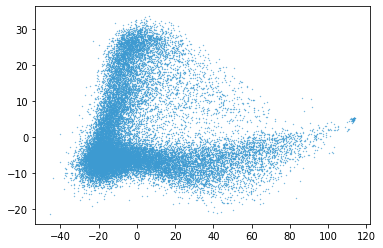

In [5]:
plt.scatter(x=z_test_tsne[:, 0], y=z_test_tsne[:, 1], c="#3D9AD1", s=0.1)
plt.show()

In [6]:
#selected_x  = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,0] > 43, z_test_tsne[:,0] < 53)))
#selected_y = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -14, z_test_tsne[:,1] < -0)))
#top_b = np.intersect1d(selected_x , selected_y)

In [7]:
horz_line = np.squeeze(np.argwhere(np.logical_and(z_test_tsne[:,1] > -8.1, z_test_tsne[:,1] < -7.9)))

In [8]:
horz_line_images = Test_Images[horz_line,:,:]
horz_line_latent = z_test_tsne[horz_line,:]

horz_line_images_sorted = np.empty(horz_line_images.shape)
horz_line_latent_sorted = np.empty(horz_line_latent.shape)

In [9]:
count = 0
for i in range(len(horz_line_images_sorted)):
    ind = np.nanargmin(horz_line_latent[:,0])
    horz_line_images_sorted[count,:] = horz_line_images[ind,:]
    horz_line_latent_sorted[count,:] = horz_line_latent[ind,:]
    horz_line_latent[ind,:] = np.array([1000.0,1000.0])
    #horz_line_images[ind,:] = np.array([1000.0,1000.0])
    count = count+1

In [11]:
#temp = horz_line_latent_sorted[:200,:]
#for i in range(200):
#    plot_generator_paper(np.squeeze(horz_line_images_sorted[i,:]), Xs, Zs)
#    print(i)

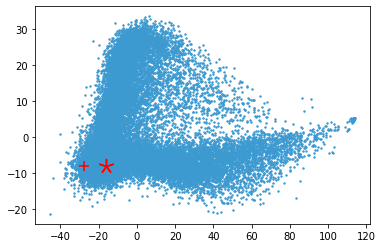

In [12]:
plt.scatter(x=z_test_tsne[:, 0], y=z_test_tsne[:, 1], c="#3D9AD1", s=2.0)
#plt.scatter(x=horz_line_latent_sorted[:, 0], y=horz_line_latent_sorted[:, 1], c="Red", s=2.0)
plt.scatter(x=horz_line_latent_sorted[9, 0], y=horz_line_latent_sorted[9, 1], c="Red", s=100.0, marker="+")
plt.scatter(x=horz_line_latent_sorted[169, 0], y=horz_line_latent_sorted[169, 1], c="Red", s=200.0, marker=(5, 2))
plt.show()

In [13]:
print(np.where(z_test_tsne == horz_line_latent_sorted[169]))
#print(np.where(z_test_tsne == horz_line_latent_sorted[150]))
#print(np.where(z_test_tsne == horz_line_latent_sorted[197]))
print(np.where(z_test_tsne == horz_line_latent_sorted[9]))

(array([6638, 6638]), array([0, 1]))
(array([18997, 18997]), array([0, 1]))


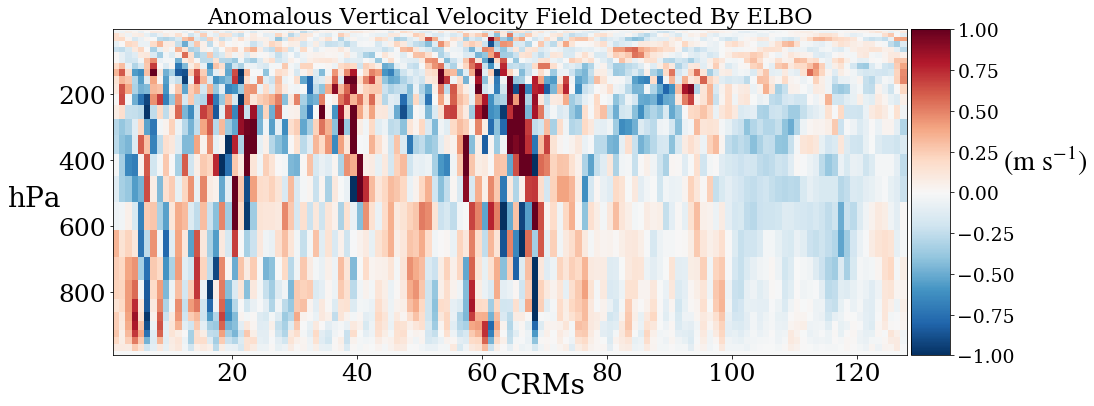

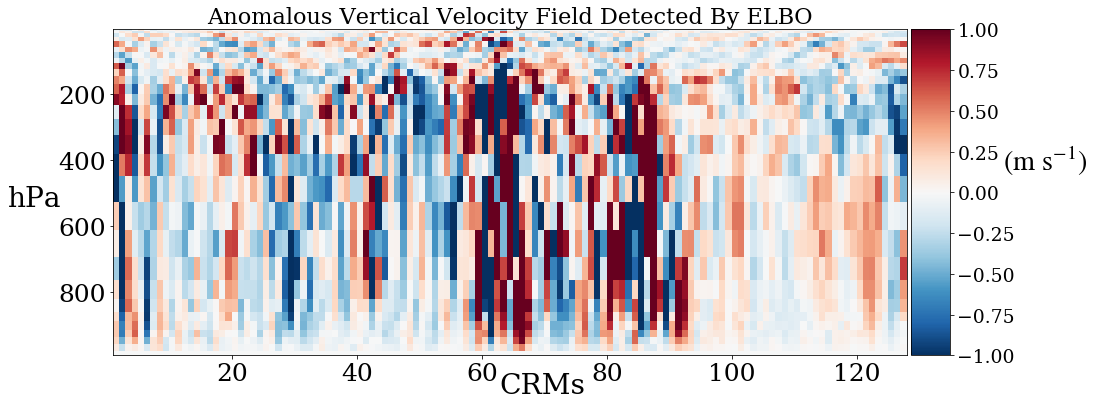

In [14]:
plot_generator_paper(np.squeeze(Test_Images[6638,:,:]),Xs, Zs)
#plot_generator_paper(np.squeeze(Test_Images[22723,:,:]),Xs, Zs)
#plot_generator_paper(np.squeeze(Test_Images[25196,:,:]),Xs, Zs)
plot_generator_paper(np.squeeze(Test_Images[18997,:,:]),Xs, Zs)

In [15]:
path = "/DFS-L/DATA/pritchard/gmooers/Workflow/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-20-00000.nc"
extra_variables = xr.open_dataset(path)
ha = extra_variables.hyai.values
hb = extra_variables.hybi.values
PS = 1e5
Pressures_real = PS*ha+PS*hb

fz = 15
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [16]:
interpolated_orig_images = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Original_Images_W_Comp_6638_18997.npy")
latent_interpolated_images = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Latent_Images_W_Comp_6638_18997.npy")
reconstructed_Image_finals = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/31_Reconstructed_Images_W_Comp_6638_18997.npy")
Interpolated_orig_images = np.interp(interpolated_orig_images, (0, 1), (Min_Scalar, Max_Scalar))
Reconstructed_Image_finals = np.interp(reconstructed_Image_finals, (0, 1), (Min_Scalar, Max_Scalar))

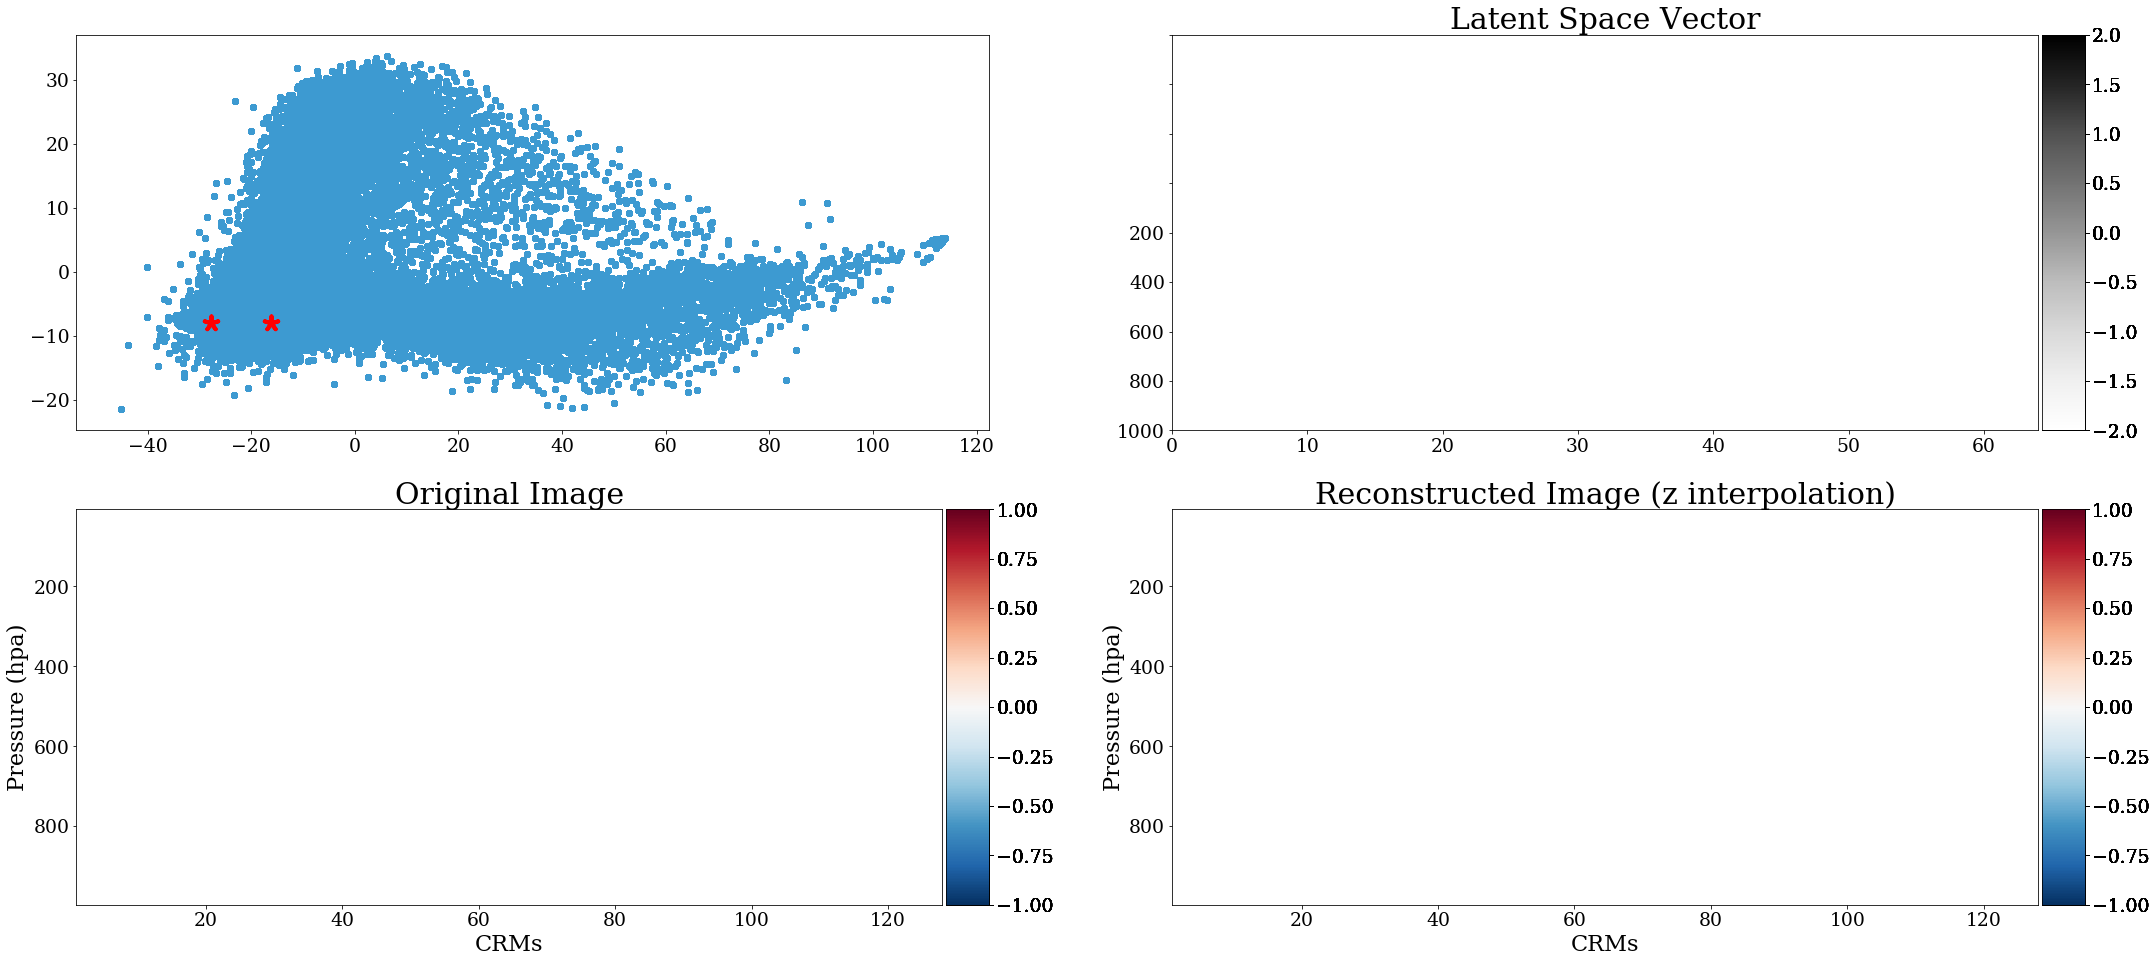

In [45]:
# change vx/vy to location on sorted images
def mikes_horz_latent_animation(y1, y2, h_const, latent_space, xdist, ydist, X, Z, o_images, r_images, latents):
    fig, ax = plt.subplots(2,2, figsize=(36,16))
    feat_list = []
    #the real total you need
    o_images = o_images.reshape(len(o_images),30,128)
    r_images = r_images.reshape(len(r_images),30,128)
    latents = latents.reshape(len(latents),16,64)
    num_steps = len(o_images)
    #num_steps = 20
    cmap= "RdBu_r"
    stepsize = np.abs(y1- y2)/num_steps
    dummy_orginal = np.zeros(shape=(30,128))
    dummy_orginal[:,:] = np.nan
    dummy_recon = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    dummy_latent = np.zeros(shape=(16,64))
    dummy_latent[:,:] = np.nan
    count = 29
    count_latent = 7
    for i in range(num_steps):
        
        for j in range(len(dummy_orginal)):
            dummy_orginal[count,:] = o_images[i,j,:]
            dummy_recon[count,:] = r_images[i,j,:]
            count = count-1
        for j in range(len(dummy_latent)):
            dummy_latent[count_latent,:] = latents[i,j,:]
            count_latent = count_latent-1
            
        h_rect = patches.Rectangle((y1-stepsize*i,h_const),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')

        
        y_ticks = np.array([1000, 800, 600, 400, 200])
        
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="#3D9AD1",  animated=True)
        ax[0,0].scatter(x=y1, y=h_const, c="Red", s=200.0, marker=(5, 2), animated=True)
        ax[0,0].scatter(x=y2, y=h_const, c="Red", s=200.0, marker=(5, 2), animated=True)

        cs0 = ax[0,0].add_patch(h_rect)
        
        cs1  = ax[0,1].pcolor(dummy_latent, cmap="Greys", vmin = -2.0, vmax = 2.0, animated=True)
        ax[0,1].set_title("Latent Space Vector", fontsize=fz*2.0)
        ax[0,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs1, cax=cax)
        
        
        cs2  = ax[1,0].pcolor(X, Z, dummy_orginal, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        ax[1,0].set_title("Original Image", fontsize=fz*2.0)
        ax[1,0].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,0].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,0].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        
        cs3 = ax[1,1].pcolor(X, Z, dummy_recon, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        ax[1,1].set_title("Reconstructed Image (z interpolation)", fontsize=fz*2.0)
        ax[1,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs3, cax=cax)
        
        
        feat_list.append([cs2, cs3, cs1, cs0])
        

        count = 29 
        count_latent=7
        
    ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Interpolation_W_Deep_To_Deep.mp4')
    plt.show()
        
    
mikes_horz_latent_animation(horz_line_latent_sorted[169,0], horz_line_latent_sorted[9,0], -8.0, z_test_tsne, 0.2, 1, Xs, Zs, Interpolated_orig_images, Reconstructed_Image_finals, latent_interpolated_images)